# Mini poyecto 1
Regresores lineales MLH y Bayesianos.
Importamos librerias e ingresamos el archivo SkillCraft1_Dataset.csv

In [452]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv
from sklearn.metrics import classification_report

new_table = pd.read_csv("SkillCraft1_Dataset.csv")
header = list(new_table)
NaN_index = [] 

In [453]:
for h in header:
    c = 0
    for n in new_table[h]:
        if n == '?':
            new_table.drop(new_table.index[c],inplace=True)
            continue
        c = c + 1
#Mostramos la tabla generada
#new_table['Index'] = [x for x in range(len(y))]
new_table.reset_index(drop=False,inplace=True)
new_table.head()

,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,...,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,...,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,2,56,4,30,10,200,69.9612,0.001101,0.000336,4,...,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,57,3,19,20,400,107.6016,0.001034,0.000213,1,...,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,4,58,3,32,10,500,122.8908,0.001136,0.000327,2,...,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [454]:
new_table[350:360]

,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
350,350,1034,5,31,4,750,205.3416,0.008150,0.000595,5,...,0.001433,0.004407,21.5078,39.8319,7.1394,32,0.001609,8,0.000000,0.000000
351,351,1043,3,16,10,200,76.6992,0.000327,0.000119,3,...,0.000282,0.002627,39.5909,90.4633,5.4576,14,0.000683,8,0.000000,0.000059
352,352,1047,4,24,14,450,98.0592,0.002748,0.000506,2,...,0.000014,0.003529,24.4938,57.2295,4.4508,16,0.001447,8,0.000000,0.000000
353,353,1053,3,26,24,120,85.4424,0.003162,0.000445,5,...,0.000062,0.002940,45.6371,78.8908,4.5042,23,0.001210,6,0.000000,0.000136
354,354,1055,4,17,8,1000,99.5586,0.003950,0.000428,3,...,0.000321,0.002986,38.7040,65.0199,5.0478,23,0.000619,6,0.000000,0.000000
355,355,1061,4,20,8,200,115.4880,0.002618,0.000278,5,...,0.000405,0.003011,36.6486,70.9077,6.7115,17,0.001552,7,0.000174,0.000903
356,356,1062,4,26,2,300,81.3360,0.000885,0.000270,2,...,0.000270,0.003181,41.1185,64.9811,4.4858,21,0.000525,6,0.000000,0.000000
357,357,1063,4,25,2,80,90.8670,0.002826,0.000422,3,...,0.000647,0.003909,34.4549,60.7914,3.8237,24,0.000830,9,0.000000,0.000056
358,359,1070,5,18,24,1200,95.6406,0.002647,0.000522,5,...,0.001081,0.003020,25.0500,60.0000,5.1605,14,0.000895,4,0.000000,0.000000
359,360,1071,2,22,8,35,68.9142,0.001119,0.000130,4,...,0.000300,0.003346,46.0719,73.8866,3.6179,27,0.000769,8,0.000000,0.000130


# LeagueIndex
LeagueIndex fue la caracteristica a determinar escogida por nosotros a partir de las siguientes:

-TotalHours

-UniqueHotkeys

-MinimapAttacks

-NumberOfPACs

-ActionsInPAC

-TotalMapExplored

-WorkersMade

-ComplexAbilitiesUsed


In [455]:
y = new_table['LeagueIndex']
X = ['TotalHours','UniqueHotkeys','NumberOfPACs','ActionsInPAC','TotalMapExplored','WorkersMade','ComplexAbilitiesUsed']

phi = np.zeros((len(y),len(X)+1))
phi[:,0] = np.ones(len(y))
for i,x in enumerate(X):
    phi[:,i+1] = np.asarray(new_table[x])
    
phi_t = phi.T
t = np.zeros((len(y),1))
t[:,0] = y
multiplicate_phi = np.dot(phi_t,phi)
inverse_of_phi = inv(multiplicate_phi)
phi_final = np.dot(inverse_of_phi,phi_t)
w = np.dot(phi_final,t)

In [456]:
print(t)

[[5.]
 [5.]
 [4.]
 ...
 [4.]
 [3.]
 [4.]]


In [457]:
Y_result = []
for i in range(len(y)):
    y_predict = w[0]
    for j,x in enumerate(X):
        y_predict = y_predict + w[j+1]*float(new_table[x][i]) 
    Y_result.append(y_predict)

[1.15452689]


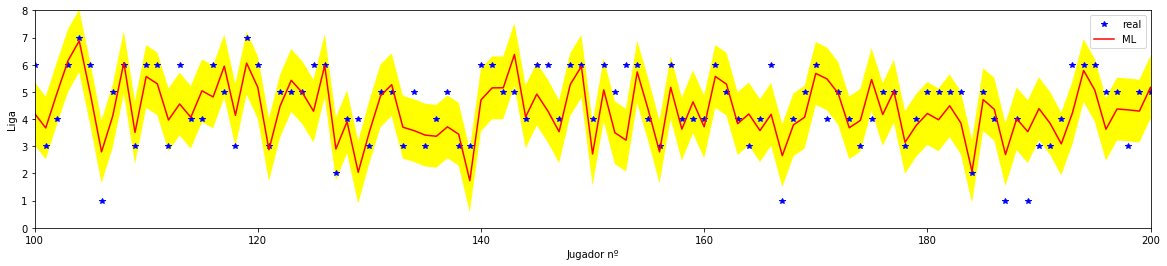

In [458]:
beta = 0
for i in range(len(y)):
    beta = beta + (y[i] - Y_result[i])**2
beta = beta/len(y)
print(beta)
x_label = range(0,len(y))
Y_result = [float(i) for i in Y_result]
Y_result = np.asarray(Y_result)
plt.figure(figsize =(20,4))
plt.plot(x_label,y,'b*',label='real')
plt.plot(x_label,Y_result,'r-',label='ML')
plt.fill_between(range(0,len(y)), Y_result-beta, Y_result+beta, facecolor='yellow')
plt.axis([100,200, 0, 8])
plt.xlabel('Jugador nº')
plt.ylabel('Liga')
plt.legend()



In [463]:
Sigma_N = 0
mu_N = 0
alpha = 0.002
#beta = beta*2
Sigma_N = np.linalg.inv(alpha * np.identity(phi.shape[1]) + beta * np.dot(phi_t, phi))
mu_N = beta * np.dot(Sigma_N, np.dot(phi_t, t))

In [464]:
Y_result = []
for i in range(len(y)):
    y_predict = mu_N[0]
    for j,x in enumerate(X):
        y_predict = y_predict + mu_N[(j+1)]*float(new_table[x][i]) 
    Y_result.append(y_predict)
print(len(Y_result))

3338


1.2707650253049942
1.2707650253049942


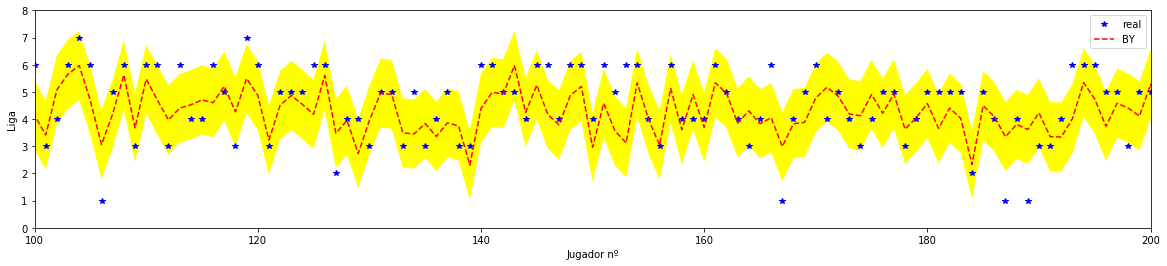

In [467]:
print(b)
b = 0
for i in range(len(y)):
    b = b + (y[i] - Y_result[i])**2
b = b/len(y)
print(b)
x_label = range(0,len(y))
Y_result = [float(i) for i in Y_result]
Y_result = np.asarray(Y_result)
plt.figure(figsize =(20,4))
plt.plot(x_label,y,'b*',label='real')
plt.plot(x_label,Y_result,'r--',label='BY')
plt.fill_between(range(0,len(y)), Y_result-b, Y_result+b, facecolor='yellow')
plt.axis([100,200, 0, 8])
plt.xlabel('Jugador nº')
plt.ylabel('Liga')
plt.legend()
